In [1]:
#import dependencies
import os
import csv
import pandas as pd
import numpy as np


In [2]:
# Combine the current working directory with the relative path
file = os.path.join("Resources", "lead_export_2023.csv")

# Read the 2024 csv file
df = pd.read_csv(file)

In [3]:
# Display the first 5 rows of the dataframe
df.head()

,Lead ID,Lead Type,Status,Date,Source,Medium
0,120168877,Web Form,Unique,2023-12-30T08:05:35-05:00,google,cpc
1,120126267,Phone Call,Unique,2023-12-29T14:50:55-05:00,google,cpc
2,120064627,Web Form,Unique,2023-12-28T20:35:32-05:00,bing,cpc
3,120008515,Phone Call,Unique,2023-12-28T11:59:19-05:00,google,cpc
4,120006423,Phone Call,Unique,2023-12-28T11:46:27-05:00,google,cpc


In [4]:
#count the number of rows in the dataframe
df.count()

Lead ID      949
Lead Type    949
Status       949
Date         949
Source       949
Medium       949
dtype: int64

In [5]:
# drop columns that are not needed
df_clean = df.drop(columns=['Lead Type', 'Status'])
df_clean.head()

,Lead ID,Date,Source,Medium
0,120168877,2023-12-30T08:05:35-05:00,google,cpc
1,120126267,2023-12-29T14:50:55-05:00,google,cpc
2,120064627,2023-12-28T20:35:32-05:00,bing,cpc
3,120008515,2023-12-28T11:59:19-05:00,google,cpc
4,120006423,2023-12-28T11:46:27-05:00,google,cpc


In [6]:
# rename columns
df_clean = df_clean.rename(columns={"Lead ID": "Lead_ID Count"})
df_clean.head()

,Lead_ID Count,Date,Source,Medium
0,120168877,2023-12-30T08:05:35-05:00,google,cpc
1,120126267,2023-12-29T14:50:55-05:00,google,cpc
2,120064627,2023-12-28T20:35:32-05:00,bing,cpc
3,120008515,2023-12-28T11:59:19-05:00,google,cpc
4,120006423,2023-12-28T11:46:27-05:00,google,cpc


In [7]:
# check for missing values
df_clean.isnull().sum()


Lead_ID Count    0
Date             0
Source           0
Medium           0
dtype: int64

In [8]:
# create a dataframe for converting date columns to datetime
date_df = pd.DataFrame(df_clean, columns=['Date'])

# convert the date columns to datetime
date_df['Date'] = pd.to_datetime(date_df['Date'], errors='coerce', utc=True)



In [9]:
# Check for any NaT values that indicate conversion issues
missing_dates = date_df[date_df['Date'].isnull()]
missing_dates

,Date


In [10]:
# count the rows in the date column with missing values
missing_dates.count()

Date    0
dtype: int64

In [11]:
#add the converted date column to the original dataframe
df_clean['Date'] = date_df['Date']

# display the first 5 rows of the dataframe
df_clean.head()


,Lead_ID Count,Date,Source,Medium
0,120168877,2023-12-30 13:05:35+00:00,google,cpc
1,120126267,2023-12-29 19:50:55+00:00,google,cpc
2,120064627,2023-12-29 01:35:32+00:00,bing,cpc
3,120008515,2023-12-28 16:59:19+00:00,google,cpc
4,120006423,2023-12-28 16:46:27+00:00,google,cpc


In [12]:
# count the number of rows in the dataframe
df_clean.count()

Lead_ID Count    949
Date             949
Source           949
Medium           949
dtype: int64

In [13]:
# group the data by month and year
df_grouped = df_clean.groupby([df_clean['Date'].dt.year, df_clean['Date'].dt.month]).count()

# display the grouped data
df_grouped

Lead_ID Count  Date  Source  Medium
Date Date                                     
2023 1                63    63      63      63
     2                89    89      89      89
     3                61    61      61      61
     4                63    63      63      63
     5                90    90      90      90
     6                84    84      84      84
     7                68    68      68      68
     8                69    69      69      69
     9                95    95      95      95
     10              102   102     102     102
     11               94    94      94      94
     12               71    71      71      71

In [14]:
# add month and year columns to the grouped data
df_grouped['Month'] = df_grouped.index.get_level_values(1)
df_grouped['Year'] = df_grouped.index.get_level_values(0)


# display the grouped data
df_grouped

Lead_ID Count  Date  Source  Medium  Month  Year
Date Date                                                  
2023 1                63    63      63      63      1  2023
     2                89    89      89      89      2  2023
     3                61    61      61      61      3  2023
     4                63    63      63      63      4  2023
     5                90    90      90      90      5  2023
     6                84    84      84      84      6  2023
     7                68    68      68      68      7  2023
     8                69    69      69      69      8  2023
     9                95    95      95      95      9  2023
     10              102   102     102     102     10  2023
     11               94    94      94      94     11  2023
     12               71    71      71      71     12  2023

In [15]:
# add the month name and year values to the dataframe
df_grouped['Month'] = df_grouped['Month'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
                                                  ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

df_grouped

Lead_ID Count  Date  Source  Medium      Month  Year
Date Date                                                      
2023 1                63    63      63      63    January  2023
     2                89    89      89      89   February  2023
     3                61    61      61      61      March  2023
     4                63    63      63      63      April  2023
     5                90    90      90      90        May  2023
     6                84    84      84      84       June  2023
     7                68    68      68      68       July  2023
     8                69    69      69      69     August  2023
     9                95    95      95      95  September  2023
     10              102   102     102     102    October  2023
     11               94    94      94      94   November  2023
     12               71    71      71      71   December  2023

In [16]:
# Drop the index and keep source, medium, and count columns
df_grouped = df_grouped.reset_index(drop=True)
df_grouped = df_grouped[['Year', 'Month', 'Lead_ID Count']]
df_grouped

,Year,Month,Lead_ID Count
0,2023,January,63
1,2023,February,89
2,2023,March,61
3,2023,April,63
4,2023,May,90
5,2023,June,84
6,2023,July,68
7,2023,August,69
8,2023,September,95
9,2023,October,102


In [17]:
# display data types
df_grouped.dtypes


Year              int32
Month            object
Lead_ID Count     int64
dtype: object

In [18]:
# save the grouped data to a csv file
df_grouped.to_csv("Resources/lead_export_2023_grouped_clean.csv", index=False)

2024 Analysis

In [19]:
# read 2024 csv file
file = os.path.join("Resources", "lead_export_2024.csv")
df_2024 = pd.read_csv(file)

# display the first 5 rows of the dataframe
df_2024.head()

,Lead ID,Lead Type,Status,Date,Source,Medium
0,158932528,Phone Call,Unique,2024-12-31T16:43:17-05:00,google,cpc
1,158892465,Phone Call,Unique,2024-12-31T11:50:26-05:00,google,cpc
2,158868259,Phone Call,Unique,2024-12-31T09:11:26-05:00,google,cpc
3,158829775,Phone Call,Unique,2024-12-30T17:13:49-05:00,bing,cpc
4,158819253,Web Form,Unique,2024-12-30T16:11:37-05:00,google,cpc


In [20]:
#count the number of rows in the 2024 dataframe
df_2024.count()

Lead ID      2481
Lead Type    2481
Status       2481
Date         2481
Source       2481
Medium       2481
dtype: int64

In [21]:
# drop columns that are not needed
df_2024_clean = df_2024.drop(columns=['Lead Type', 'Status'])
df_2024_clean.head()

,Lead ID,Date,Source,Medium
0,158932528,2024-12-31T16:43:17-05:00,google,cpc
1,158892465,2024-12-31T11:50:26-05:00,google,cpc
2,158868259,2024-12-31T09:11:26-05:00,google,cpc
3,158829775,2024-12-30T17:13:49-05:00,bing,cpc
4,158819253,2024-12-30T16:11:37-05:00,google,cpc


In [22]:
# rename columns
df_2024_clean = df_2024_clean.rename(columns={"Lead ID": "Lead_ID Count"})
df_2024_clean.head()

,Lead_ID Count,Date,Source,Medium
0,158932528,2024-12-31T16:43:17-05:00,google,cpc
1,158892465,2024-12-31T11:50:26-05:00,google,cpc
2,158868259,2024-12-31T09:11:26-05:00,google,cpc
3,158829775,2024-12-30T17:13:49-05:00,bing,cpc
4,158819253,2024-12-30T16:11:37-05:00,google,cpc


In [23]:
# check for missing values
df_2024_clean.isnull().sum()

Lead_ID Count    0
Date             0
Source           0
Medium           0
dtype: int64

In [24]:
#check for duplicates
duplicates = df_2024_clean.duplicated()
duplicates

0       False
1       False
2       False
3       False
4       False
        ...  
2476    False
2477    False
2478    False
2479    False
2480    False
Length: 2481, dtype: bool

In [25]:
# check for missing values
df_2024_clean.isnull().sum()

Lead_ID Count    0
Date             0
Source           0
Medium           0
dtype: int64

In [26]:
# create a dataframe for converting date columns to datetime
date_2024_df = pd.DataFrame(df_2024_clean, columns=['Date'])

# convert the date columns to datetime
date_2024_df['Date'] = pd.to_datetime(date_2024_df['Date'], errors='coerce', utc=True)

In [27]:
# Check for any NaT values that indicate conversion issues
missing_dates_2024 = date_2024_df[date_2024_df['Date'].isnull()]
missing_dates_2024


,Date


In [28]:
# count the rows in the date column with missing values
missing_dates_2024.count()

Date    0
dtype: int64

In [29]:
# add the converted date column to the original dataframe
df_2024_clean['Date'] = date_2024_df['Date']

# display the first 5 rows of the dataframe
df_2024.head()

,Lead ID,Lead Type,Status,Date,Source,Medium
0,158932528,Phone Call,Unique,2024-12-31T16:43:17-05:00,google,cpc
1,158892465,Phone Call,Unique,2024-12-31T11:50:26-05:00,google,cpc
2,158868259,Phone Call,Unique,2024-12-31T09:11:26-05:00,google,cpc
3,158829775,Phone Call,Unique,2024-12-30T17:13:49-05:00,bing,cpc
4,158819253,Web Form,Unique,2024-12-30T16:11:37-05:00,google,cpc


In [30]:
# count the number of rows in the dataframe
df_2024.count()

Lead ID      2481
Lead Type    2481
Status       2481
Date         2481
Source       2481
Medium       2481
dtype: int64

In [31]:
# group the data by month and year
df_2024_grouped = df_2024_clean.groupby([df_2024_clean['Date'].dt.year, df_2024_clean['Date'].dt.month]).count()

# display the grouped data
df_2024_grouped

Lead_ID Count  Date  Source  Medium
Date Date                                     
2024 1                84    84      84      84
     2                52    52      52      52
     3                62    62      62      62
     4               102   102     102     102
     5               160   160     160     160
     6               179   179     179     179
     7               296   296     296     296
     8               334   334     334     334
     9               558   558     558     558
     10              310   310     310     310
     11              187   187     187     187
     12              157   157     157     157

In [32]:
# add month and year columns to the grouped data
df_2024_grouped['Month'] = df_2024_grouped.index.get_level_values(1)
df_2024_grouped['Year'] = df_2024_grouped.index.get_level_values(0)

# display the grouped data
df_2024_grouped

Lead_ID Count  Date  Source  Medium  Month  Year
Date Date                                                  
2024 1                84    84      84      84      1  2024
     2                52    52      52      52      2  2024
     3                62    62      62      62      3  2024
     4               102   102     102     102      4  2024
     5               160   160     160     160      5  2024
     6               179   179     179     179      6  2024
     7               296   296     296     296      7  2024
     8               334   334     334     334      8  2024
     9               558   558     558     558      9  2024
     10              310   310     310     310     10  2024
     11              187   187     187     187     11  2024
     12              157   157     157     157     12  2024

In [33]:
# add the month name and year values to the dataframe
df_2024_grouped['Month'] = df_2024_grouped['Month'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
                                                  ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

df_2024_grouped

Lead_ID Count  Date  Source  Medium      Month  Year
Date Date                                                      
2024 1                84    84      84      84    January  2024
     2                52    52      52      52   February  2024
     3                62    62      62      62      March  2024
     4               102   102     102     102      April  2024
     5               160   160     160     160        May  2024
     6               179   179     179     179       June  2024
     7               296   296     296     296       July  2024
     8               334   334     334     334     August  2024
     9               558   558     558     558  September  2024
     10              310   310     310     310    October  2024
     11              187   187     187     187   November  2024
     12              157   157     157     157   December  2024

In [34]:
# Drop the index and keep source, medium, and count columns
df_2024_grouped = df_2024_grouped.reset_index(drop=True)
df_2024_grouped = df_2024_grouped[['Year', 'Month', 'Lead_ID Count']]
df_2024_grouped

,Year,Month,Lead_ID Count
0,2024,January,84
1,2024,February,52
2,2024,March,62
3,2024,April,102
4,2024,May,160
5,2024,June,179
6,2024,July,296
7,2024,August,334
8,2024,September,558
9,2024,October,310


In [35]:
# display data types
df_2024_grouped.dtypes


Year              int32
Month            object
Lead_ID Count     int64
dtype: object

In [36]:
# save the grouped data to a csv file
df_2024_grouped.to_csv("Resources/lead_export_2024_grouped_clean.csv", index=False)

Merge

In [37]:
# import 2023 and 2024 data and merge the dataframes

# read 2023 csv file
file = os.path.join("Resources", "lead_export_2023_grouped_clean.csv")
df_2023 = pd.read_csv(file)

# display the first 5 rows of the dataframe
df_2023.head()

,Year,Month,Lead_ID Count
0,2023,January,63
1,2023,February,89
2,2023,March,61
3,2023,April,63
4,2023,May,90


In [38]:
# read 2024 csv file
file = os.path.join("Resources", "lead_export_2024_grouped_clean.csv")
df_2024 = pd.read_csv(file)

# display the first 5 rows of the dataframe
df_2024.head()


,Year,Month,Lead_ID Count
0,2024,January,84
1,2024,February,52
2,2024,March,62
3,2024,April,102
4,2024,May,160


In [39]:
# merge the 2023 and 2024 dataframes
df_combined = pd.concat([df_2023, df_2024], ignore_index=True)
df_combined

,Year,Month,Lead_ID Count
0,2023,January,63
1,2023,February,89
2,2023,March,61
3,2023,April,63
4,2023,May,90
5,2023,June,84
6,2023,July,68
7,2023,August,69
8,2023,September,95
9,2023,October,102


Forecast 2025 Analysis

In [40]:
# import dependencies
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt


In [41]:
# Step 1: Load and Clean Data
data = pd.read_csv('c:/Users/a3588/Documents/GitHub/Forecasting leads and ad spend/Forecasting leads and ad spend/Resources/combined_lead_export_data.csv')
data['Cost'] = data['Cost'].replace('[\$,]', '', regex=True).astype(float)  # Convert 'Cost' to numeric
data['Month'] = pd.Categorical(data['Month'], categories=[
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
], ordered=True)
data['Month_Num'] = data['Month'].cat.codes + 1  # Add numeric representation of months

<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
C:\Users\a3588\AppData\Local\Temp\ipykernel_2884\1371892783.py:3: SyntaxWarning: invalid escape sequence '\$'
  data['Cost'] = data['Cost'].replace('[\$,]', '', regex=True).astype(float)  # Convert 'Cost' to numeric


In [42]:
# Step 2: Feature Engineering
# Step 2: Feature Engineering
data['Month_sin'] = np.sin(2 * np.pi * data['Month_Num'] / 12)
data['Month_cos'] = np.cos(2 * np.pi * data['Month_Num'] / 12)
data['Cost_lag_1'] = data['Cost'].shift(1)
data['Cost_rolling_3'] = data['Cost'].rolling(window=3).mean()
data['Cost_rolling_6'] = data['Cost'].rolling(window=6).mean()
data['Leads_lag_1'] = data['Lead_ID Count'].shift(1)
data['Leads_rolling_3'] = data['Lead_ID Count'].rolling(window=3).mean()
data['Leads_rolling_6'] = data['Lead_ID Count'].rolling(window=6).mean()

In [43]:
# Fill NaN values caused by lag/rolling operations
data.fillna(method='bfill', inplace=True)

# Step 3: Prepare Data for Modeling
features = data[['Year', 'Month_Num', 'Month_sin', 'Month_cos', 'Cost_lag_1', 'Cost_rolling_3', 'Cost_rolling_6', 'Leads_lag_1', 'Leads_rolling_3', 'Leads_rolling_6']]
targets_cost = data['Cost']
targets_leads = data['Lead_ID Count']

C:\Users\a3588\AppData\Local\Temp\ipykernel_2884\3939522436.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='bfill', inplace=True)


In [44]:
# Split into training data (2023-2024) and future forecast (2025)
X_train = features[features['Year'] < 2025]
y_train_cost = targets_cost[features['Year'] < 2025]
y_train_leads = targets_leads[features['Year'] < 2025]
X_forecast = pd.DataFrame({
    'Year': [2025] * 12,
    'Month_Num': np.arange(1, 13),
    'Month_sin': np.sin(2 * np.pi * np.arange(1, 13) / 12),
    'Month_cos': np.cos(2 * np.pi * np.arange(1, 13) / 12),
    'Cost_lag_1': [np.nan] * 12,  # Placeholder
    'Cost_rolling_3': [np.nan] * 12,  # Placeholder
    'Cost_rolling_6': [np.nan] * 12,  # Placeholder
    'Leads_lag_1': [np.nan] * 12,  # Placeholder
    'Leads_rolling_3': [np.nan] * 12,  # Placeholder,
    'Leads_rolling_6': [np.nan] * 12   # Placeholder
})

In [45]:
# Use the last known values to fill lagged and rolling averages for the forecast
X_forecast['Cost_lag_1'] = data[data['Year'] == 2024]['Cost'].iloc[-1]
X_forecast['Cost_rolling_3'] = data[data['Year'] == 2024]['Cost'].iloc[-3:].mean()
X_forecast['Cost_rolling_6'] = data[data['Year'] == 2024]['Cost'].iloc[-6:].mean()
X_forecast['Leads_lag_1'] = data[data['Year'] == 2024]['Lead_ID Count'].iloc[-1]
X_forecast['Leads_rolling_3'] = data[data['Year'] == 2024]['Lead_ID Count'].iloc[-3:].mean()
X_forecast['Leads_rolling_6'] = data[data['Year'] == 2024]['Lead_ID Count'].iloc[-6:].mean()

In [46]:
# Step 4: Train Models
model_cost = RandomForestRegressor(random_state=42, n_estimators=100)
model_leads = RandomForestRegressor(random_state=42, n_estimators=100)
model_cost.fit(X_train, y_train_cost)
model_leads.fit(X_train, y_train_leads)

RandomForestRegressor(random_state=42)

In [47]:
# Step 5: Forecast Costs and Leads
forecast_cost = model_cost.predict(X_forecast) * 1.1  # Adjust for 10% growth
forecast_leads = model_leads.predict(X_forecast) * 1.1  # Adjust for 10% growth

In [48]:
# Step 6: Combine Results for Visualization
forecast_data = pd.DataFrame({
    'Year': X_forecast['Year'],
    'Month': pd.Categorical(
        ['January', 'February', 'March', 'April', 'May', 'June',
         'July', 'August', 'September', 'October', 'November', 'December'],
        categories=[
            'January', 'February', 'March', 'April', 'May', 'June',
            'July', 'August', 'September', 'October', 'November', 'December'
        ],
        ordered=True
    ),
    'Forecasted_Cost': forecast_cost,
    'Forecasted_Leads': forecast_leads
})

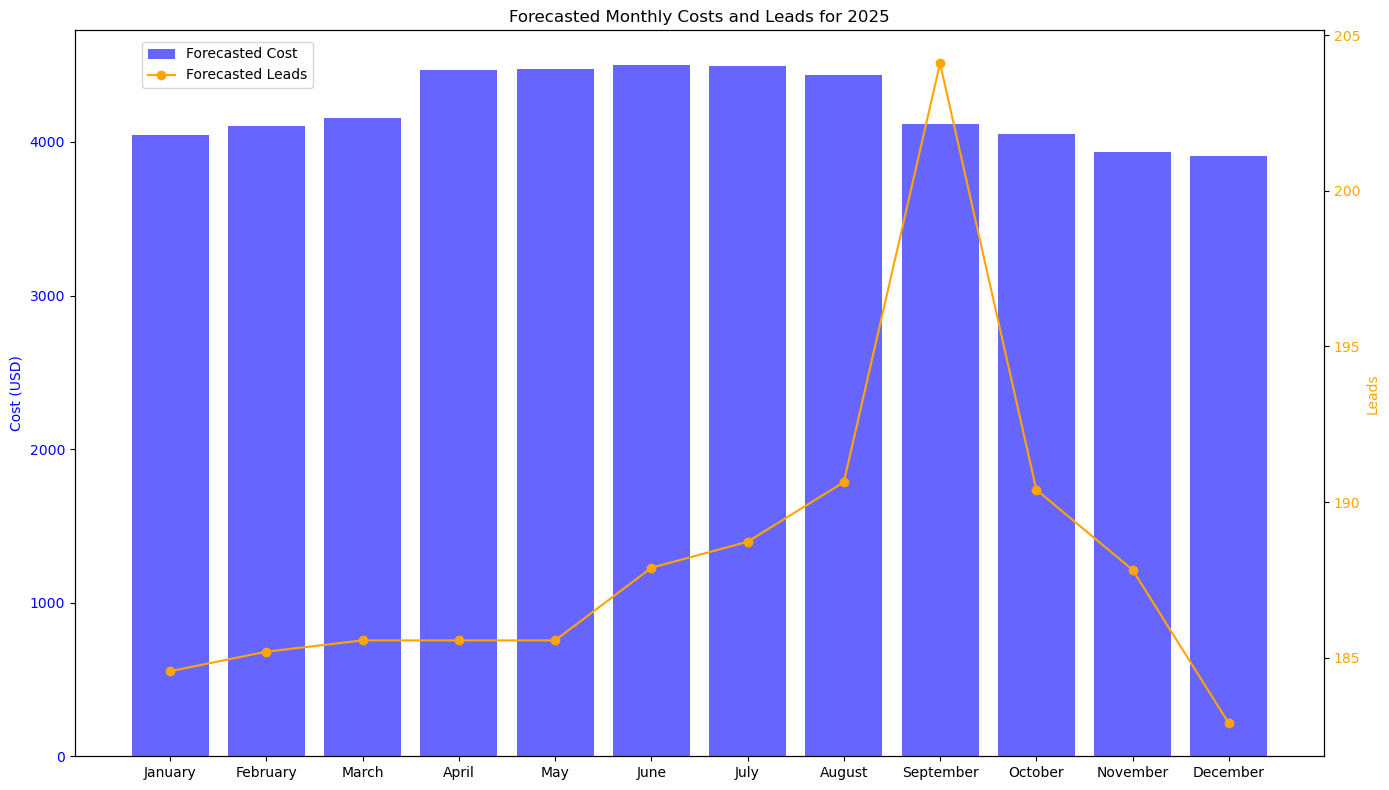

In [49]:
# Step 7: Visualization
fig, ax1 = plt.subplots(figsize=(14, 8))

# Bar chart for forecasted cost
ax1.bar(forecast_data['Month'], forecast_data['Forecasted_Cost'], alpha=0.6, label='Forecasted Cost', color='blue')
ax1.set_ylabel('Cost (USD)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Line chart for forecasted leads
ax2 = ax1.twinx()
ax2.plot(forecast_data['Month'], forecast_data['Forecasted_Leads'], color='orange', marker='o', label='Forecasted Leads')
ax2.set_ylabel('Leads', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Titles and legends
ax1.set_title('Forecasted Monthly Costs and Leads for 2025')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.95))

#save the plot
plt.savefig('C:/Users/a3588/Documents/NP Analysis/Enclosure Guy/Resources/forecasted_monthly_costs_and_leads.png')

plt.show()